# DataMadness 2023: Ultimate Simpsons Guide

By Jan Grapenthin, Nikola Prianikov, Michael Balzer

## Part 0: Motivation

## Part 1: Data retrieving and Scrapping

TODO:
1. IMDB ratings per episode for age/gender e.g.: https://www.imdb.com/title/tt0701122/ratings/?ref_=tt_ov_rt
    - look for episode titles here: https://www.imdb.com/title/tt0096697/episodes?season=1
2. Episode features from fandom wiki e.g., https://simpsons.fandom.com/wiki/Some_Enchanted_Evening
    - look for things inside <asdie role='region'> blob
3. Episode insight from fandom wiki e.g., https://simpsons.fandom.com/wiki/Some_Enchanted_Evening/References
    - look for Trivia, Cultural References, Goofs, etc...

### What features do we want to add

From IMDB:
* Ratings by demographics per episode (apprx. 600 episodes)

From fandom wiki 'region' blob of episode:
* main_character(s)
* blackboardText
* couchGag
* specialGuestVoices
* Show Runner
* Written By
* Directed By

From fandom wiki References page of each episode
* Cultural references
* Trivia
* Goofs
* Previous Episode References - a bit more detailed here e.g., from which season/episode was the reference made
* Continuity (wtf is this but we can probably keep it)

## Part 2: Exploratory Data Analysis

Everyone plays around with data...

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
demographics = pd.read_csv('./Datasets/scraped/voting_demographics.csv')

demographics.describe()
demographics.columns

Index(['Unnamed: 0', 'season', 'episode', 'total_counts', 'total_rating',
       '<18_counts', '<18_rating', '18-29_counts', '18-29_rating',
       '30-44_counts', '30-44_rating', '45+_counts', '45+_rating',
       'male_counts', 'male_rating', 'male_<18_counts', 'male_<18_rating',
       'male_18-29_counts', 'male_18-29_rating', 'male_30-44_counts',
       'male_30-44_rating', 'male_45+_counts', 'male_45+_rating',
       'female_counts', 'female_rating', 'female_<18_counts',
       'female_<18_rating', 'female_18-29_counts', 'female_18-29_rating',
       'female_30-44_counts', 'female_30-44_rating', 'female_45+_counts',
       'female_45+_rating', 'top1000_counts', 'top1000_rating',
       'us_users_counts', 'us_users_rating', 'non-us_users_counts',
       'non-us_users_rating'],
      dtype='object')

<AxesSubplot: ylabel='Density'>

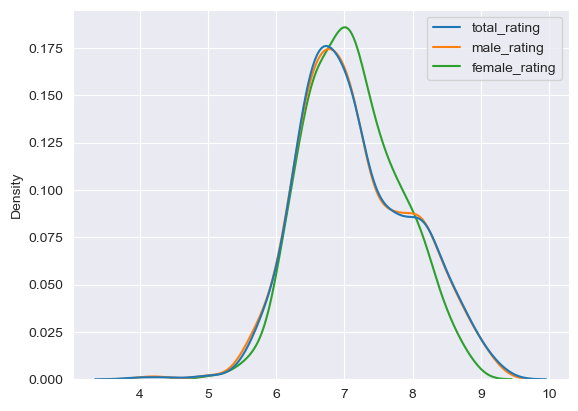

In [3]:
sns.kdeplot(data=[demographics['total_rating'], demographics['male_rating'], demographics['female_rating']], legend=True)


Females give higher ratings on average, indication of much less female voters than male voters since male curve follows total curve accurately while female curve is off.

<AxesSubplot: ylabel='Density'>

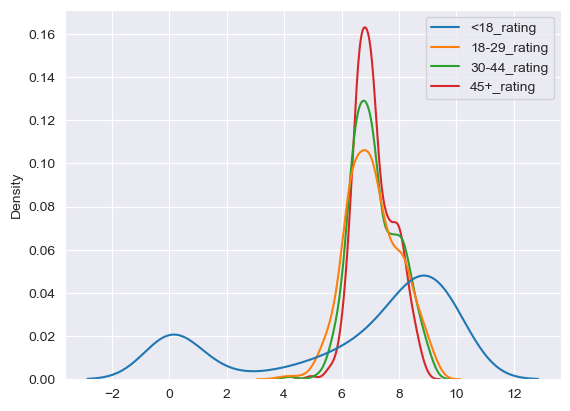

In [4]:
sns.kdeplot(data=[demographics['<18_rating'], demographics['18-29_rating'], demographics['30-44_rating'],demographics['45+_rating']])

The only age group that seems to behave significantly different is the age group <18, which indicates that there is no real influence of the age on voting behavior.

<AxesSubplot: ylabel='Density'>

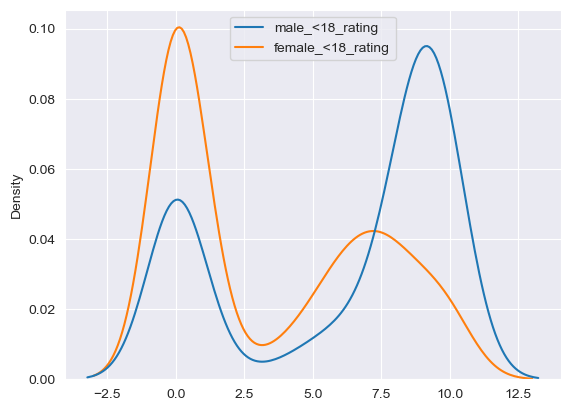

In [5]:
sns.kdeplot(data=[demographics['male_<18_rating'], demographics['female_<18_rating']])

Female voters seem to give mostly bad rating while male voters give mostly good ratings, and the ratings overall just split into two main extremes.

<AxesSubplot: ylabel='Density'>

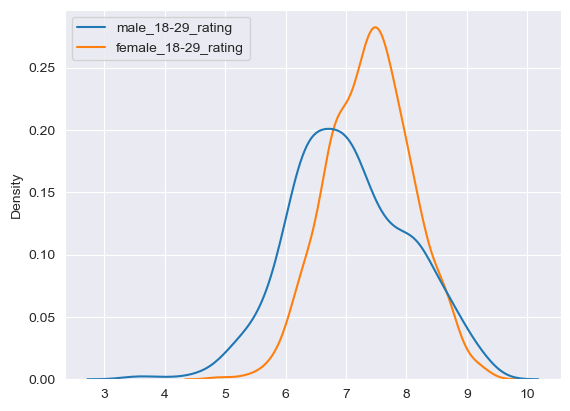

In [6]:
sns.kdeplot(data=[demographics['male_18-29_rating'], demographics['female_18-29_rating']])

As the age progresses the voting behavior seems to unify

<AxesSubplot: ylabel='Density'>

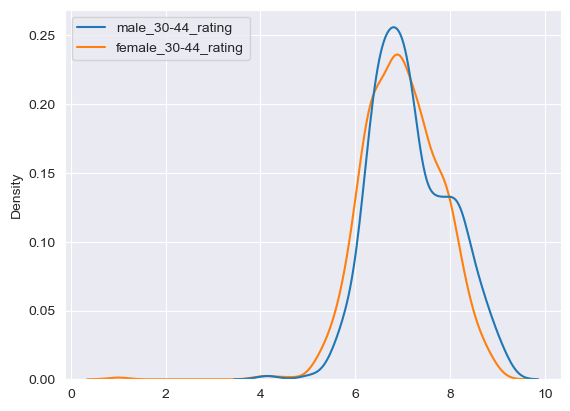

In [7]:
sns.kdeplot(data=[demographics['male_30-44_rating'], demographics['female_30-44_rating']])

Even more similar

<AxesSubplot: ylabel='Density'>

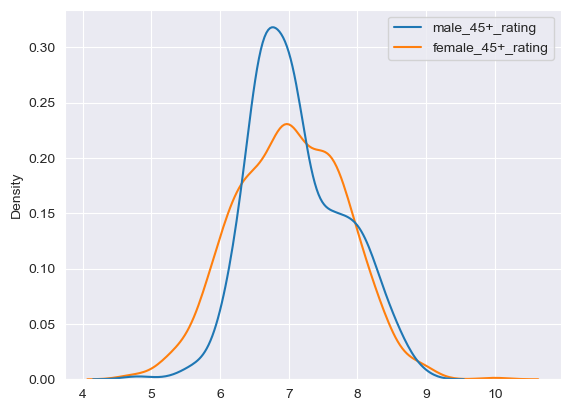

In [8]:
sns.kdeplot(data=[demographics['male_45+_rating'], demographics['female_45+_rating']])

For 45+ the female behavior changes again, possibly due to a difference in population size

<AxesSubplot: xlabel='Unnamed: 0'>

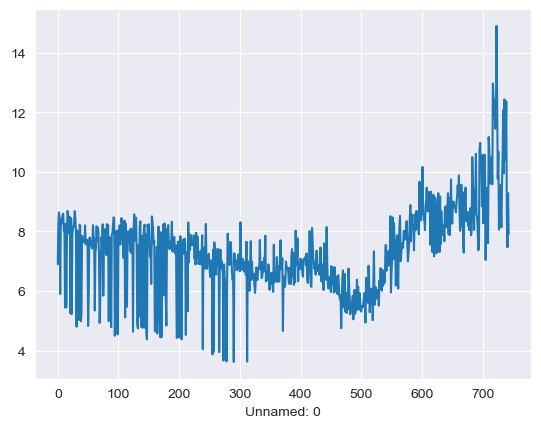

In [9]:
sns.lineplot(x=demographics['Unnamed: 0'], y=demographics['male_counts']/demographics['female_counts'])

As suspected male voter audience 4 to 15 times larger than the female voting audience.

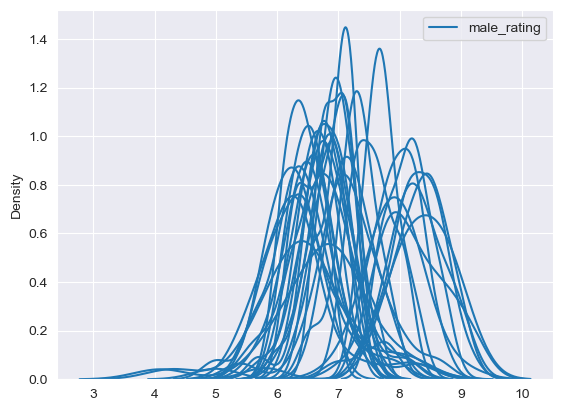

In [10]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'male_rating']])

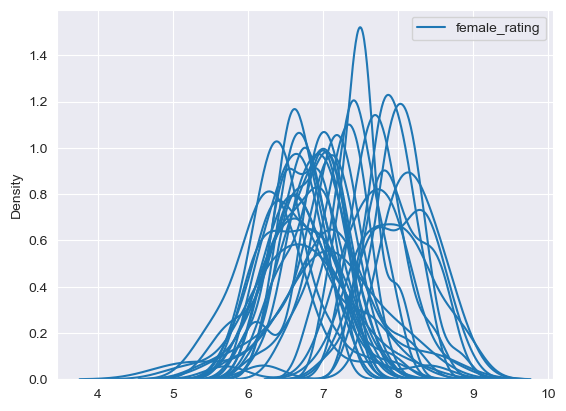

In [11]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'female_rating']])

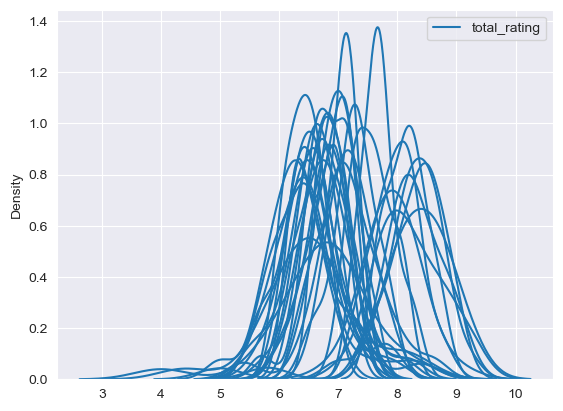

In [12]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'total_rating']])

<AxesSubplot: ylabel='Density'>

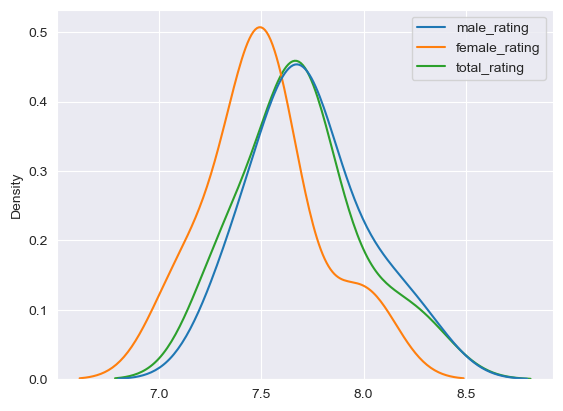

In [13]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 1, 'male_rating'],
                  demographics.loc[demographics['season'] == 1, 'female_rating'],
                   demographics.loc[demographics['season'] == 1, 'total_rating']])

<AxesSubplot: ylabel='Density'>

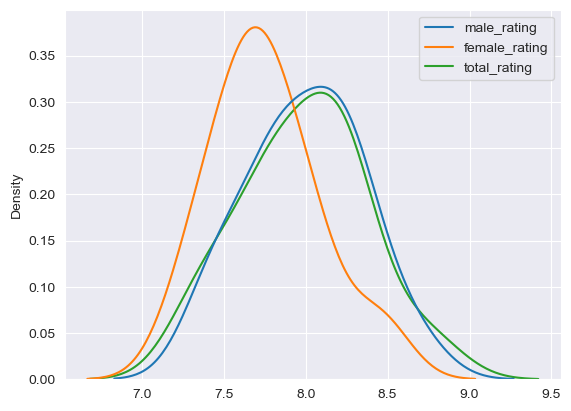

In [14]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 2, 'male_rating'],
                  demographics.loc[demographics['season'] == 2, 'female_rating'],
                   demographics.loc[demographics['season'] == 2, 'total_rating']])

<AxesSubplot: ylabel='Density'>

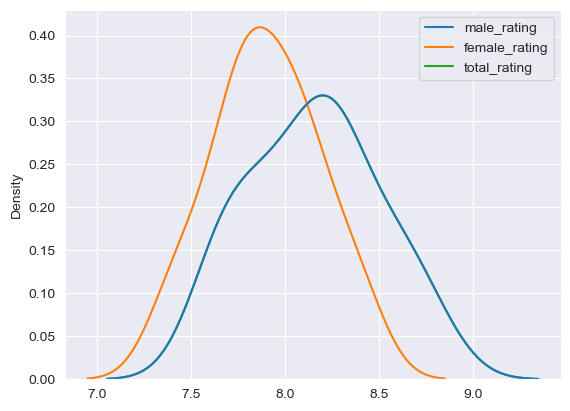

In [15]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 3, 'male_rating'],
                  demographics.loc[demographics['season'] == 3, 'female_rating'],
                   demographics.loc[demographics['season'] == 3, 'total_rating']])

<AxesSubplot: ylabel='Density'>

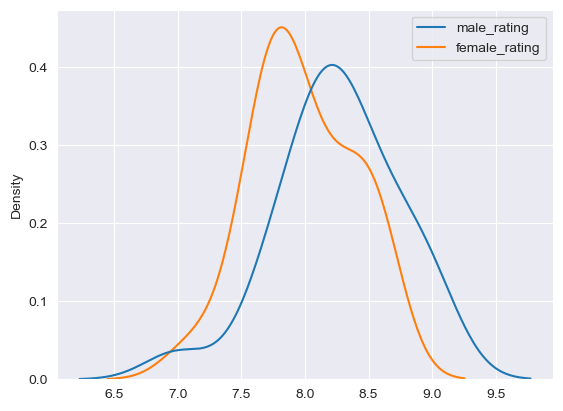

In [16]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 4, 'male_rating'],
                  demographics.loc[demographics['season'] == 4, 'female_rating'],
                   demographics.loc[demographics['season'] == 4, 'female_rating']])

<AxesSubplot: ylabel='Density'>

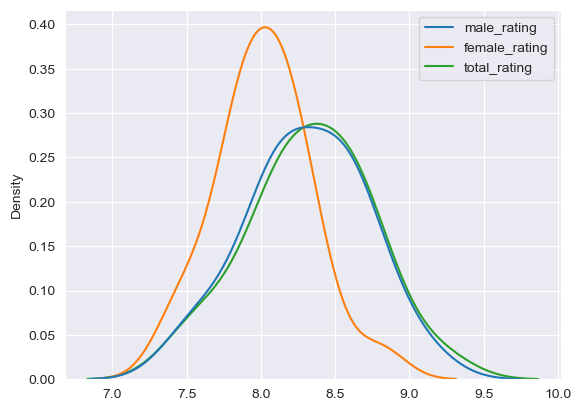

In [17]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 5, 'male_rating'],
                  demographics.loc[demographics['season'] == 5, 'female_rating'],
                   demographics.loc[demographics['season'] == 5, 'total_rating']])

<AxesSubplot: ylabel='Density'>

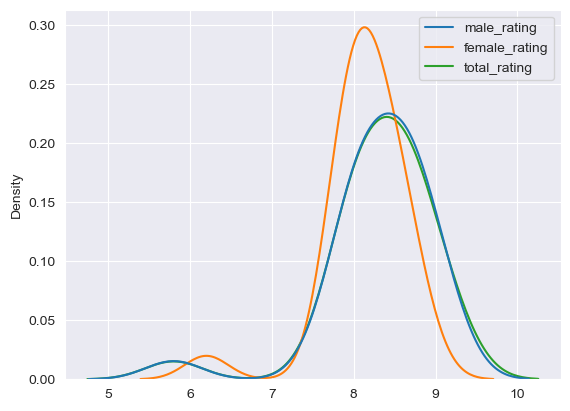

In [18]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 6, 'male_rating'],
                  demographics.loc[demographics['season'] == 6, 'female_rating'],
                   demographics.loc[demographics['season'] == 6, 'total_rating']])

<AxesSubplot: ylabel='Density'>

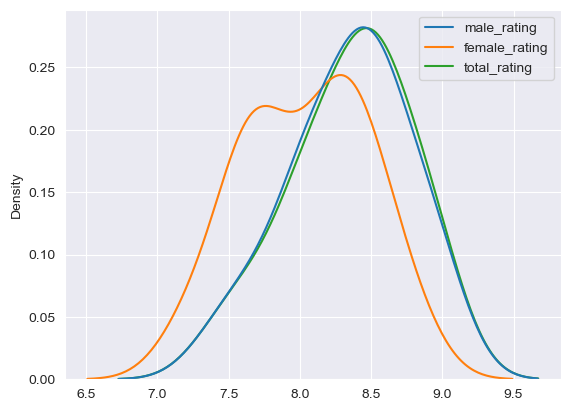

In [19]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 7, 'male_rating'],
                  demographics.loc[demographics['season'] == 7, 'female_rating'],
                   demographics.loc[demographics['season'] == 7, 'total_rating']])

<AxesSubplot: ylabel='Density'>

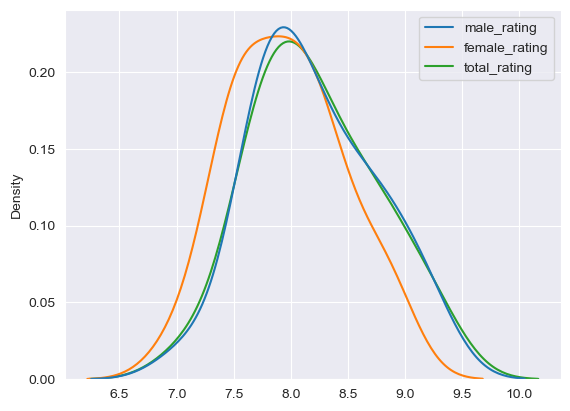

In [20]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 8, 'male_rating'],
                  demographics.loc[demographics['season'] == 8, 'female_rating'],
                  demographics.loc[demographics['season'] == 8, 'total_rating']])

<AxesSubplot: ylabel='Density'>

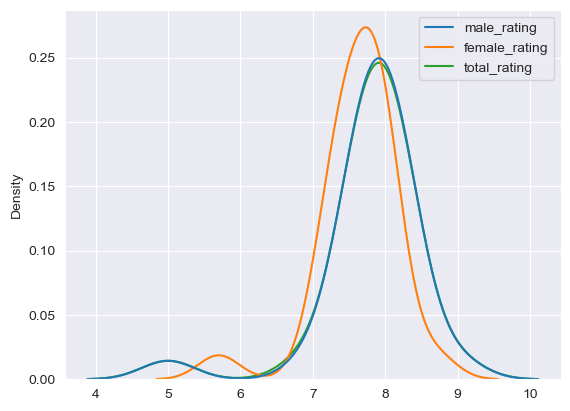

In [21]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 9, 'male_rating'],
                  demographics.loc[demographics['season'] == 9, 'female_rating'],
                  demographics.loc[demographics['season'] == 9, 'total_rating']])

<AxesSubplot: ylabel='Density'>

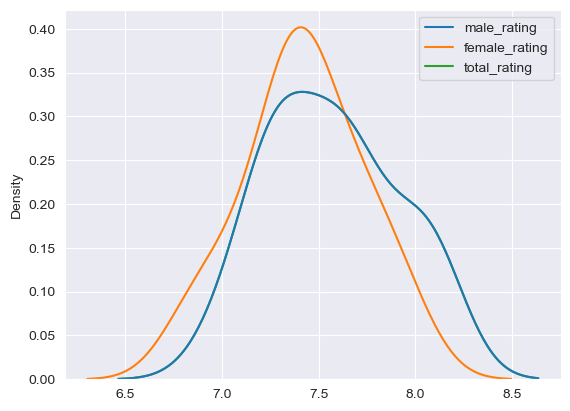

In [22]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 10, 'male_rating'],
                  demographics.loc[demographics['season'] == 10, 'female_rating'],
                  demographics.loc[demographics['season'] == 10, 'total_rating']])

<AxesSubplot: ylabel='Density'>

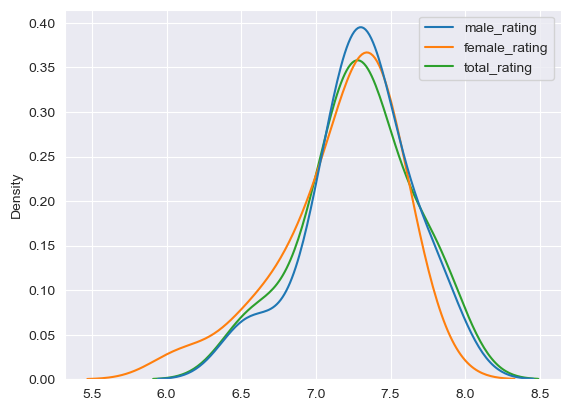

In [23]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 11, 'male_rating'],
                  demographics.loc[demographics['season'] == 11, 'female_rating'],
                  demographics.loc[demographics['season'] == 11, 'total_rating']])

<AxesSubplot: ylabel='Density'>

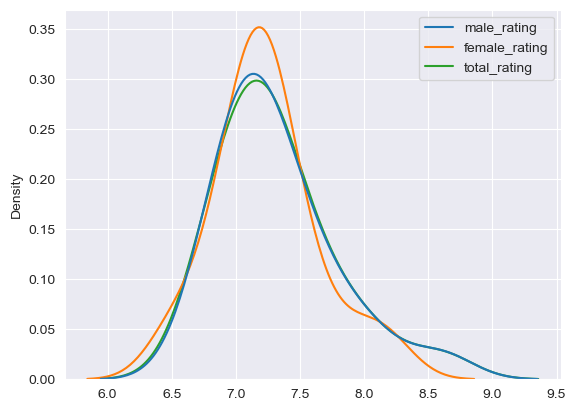

In [24]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 12, 'male_rating'],
                  demographics.loc[demographics['season'] == 12, 'female_rating'],
                  demographics.loc[demographics['season'] == 12, 'total_rating']])

<AxesSubplot: ylabel='Density'>

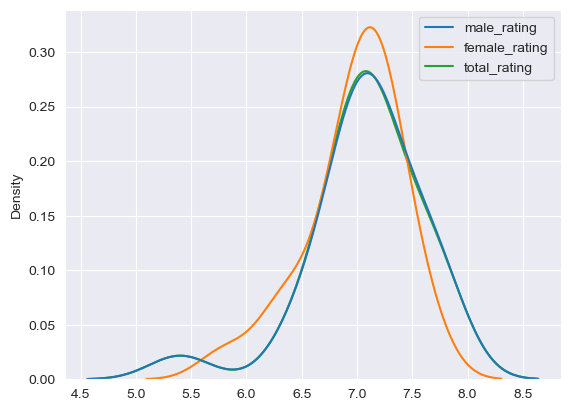

In [25]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 13, 'male_rating'],
                  demographics.loc[demographics['season'] == 13, 'female_rating'],
                  demographics.loc[demographics['season'] == 13, 'total_rating']])

<AxesSubplot: ylabel='Density'>

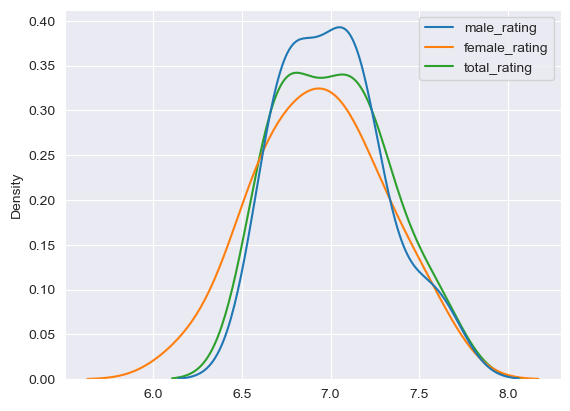

In [26]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 14, 'male_rating'],
                  demographics.loc[demographics['season'] == 14, 'female_rating'],
                  demographics.loc[demographics['season'] == 14, 'total_rating']])

<AxesSubplot: ylabel='Density'>

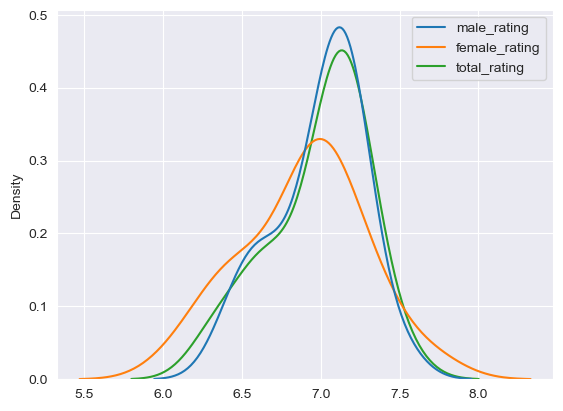

In [27]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 15, 'male_rating'],
                  demographics.loc[demographics['season'] == 15, 'female_rating'],
                  demographics.loc[demographics['season'] == 15, 'total_rating']])

<AxesSubplot: ylabel='Density'>

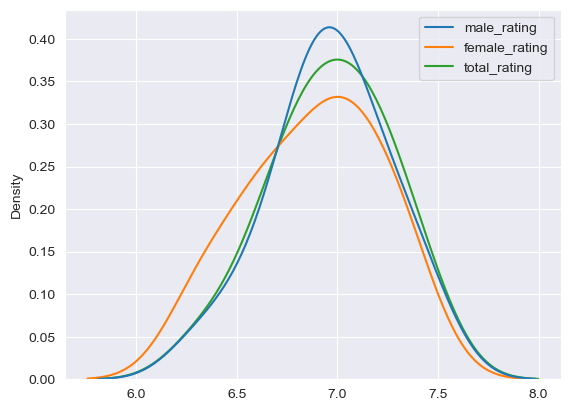

In [28]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 16, 'male_rating'],
                  demographics.loc[demographics['season'] == 16, 'female_rating'],
                  demographics.loc[demographics['season'] == 16, 'total_rating']])

<AxesSubplot: ylabel='Density'>

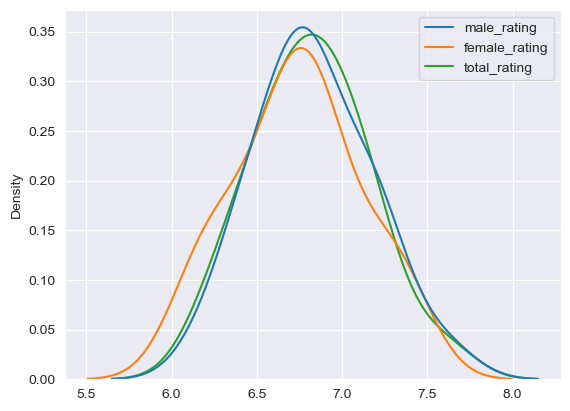

In [29]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 17, 'male_rating'],
                  demographics.loc[demographics['season'] == 17, 'female_rating'],
                  demographics.loc[demographics['season'] == 17, 'total_rating']])

<AxesSubplot: ylabel='Density'>

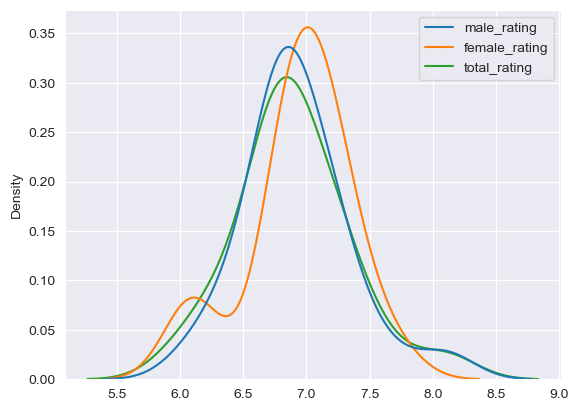

In [30]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 18, 'male_rating'],
                  demographics.loc[demographics['season'] == 18, 'female_rating'],
                  demographics.loc[demographics['season'] == 18, 'total_rating']])

<AxesSubplot: ylabel='Density'>

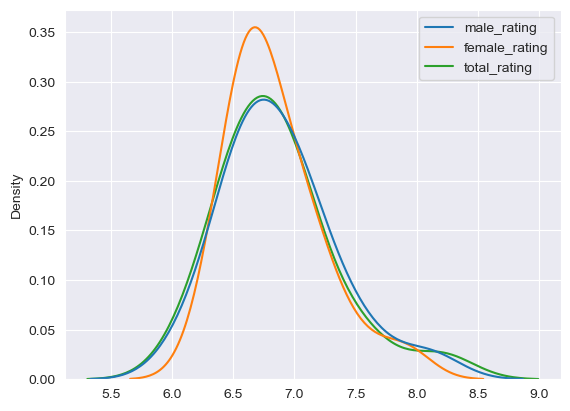

In [31]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 19, 'male_rating'],
                  demographics.loc[demographics['season'] == 19, 'female_rating'],
                  demographics.loc[demographics['season'] == 19, 'total_rating']])

<AxesSubplot: ylabel='Density'>

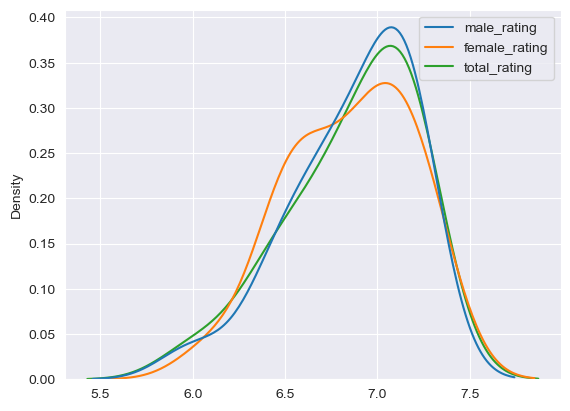

In [32]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 20, 'male_rating'],
                  demographics.loc[demographics['season'] == 20, 'female_rating'],
                  demographics.loc[demographics['season'] == 20, 'total_rating']])

<AxesSubplot: ylabel='Density'>

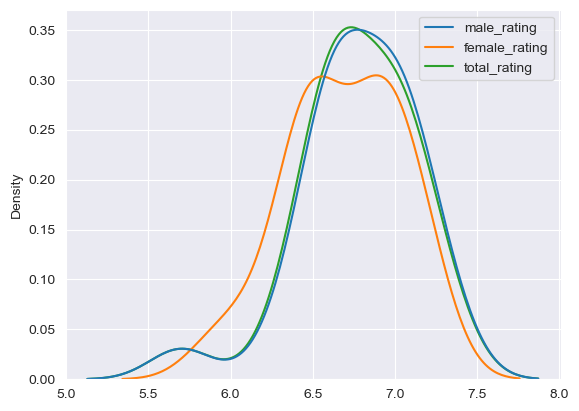

In [33]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 21, 'male_rating'],
                  demographics.loc[demographics['season'] == 21, 'female_rating'],
                  demographics.loc[demographics['season'] == 21, 'total_rating']])

<AxesSubplot: ylabel='Density'>

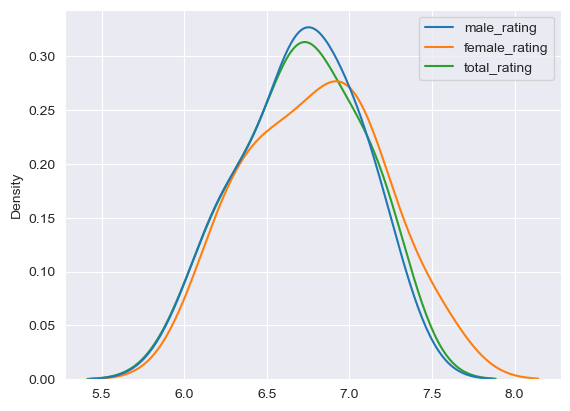

In [34]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 22, 'male_rating'],
                  demographics.loc[demographics['season'] == 22, 'female_rating'],
                  demographics.loc[demographics['season'] == 22, 'total_rating']])

<AxesSubplot: ylabel='Density'>

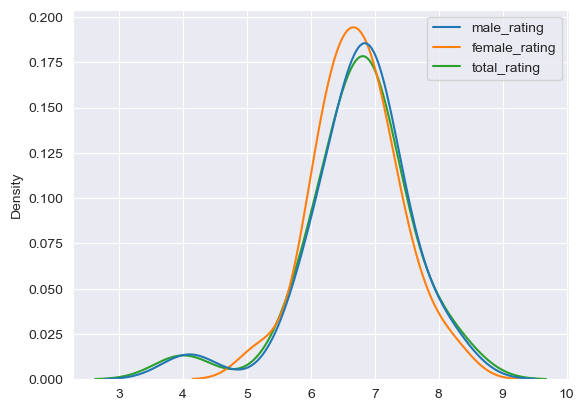

In [35]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 23, 'male_rating'],
                  demographics.loc[demographics['season'] == 23, 'female_rating'],
                  demographics.loc[demographics['season'] == 23, 'total_rating']])

<AxesSubplot: ylabel='Density'>

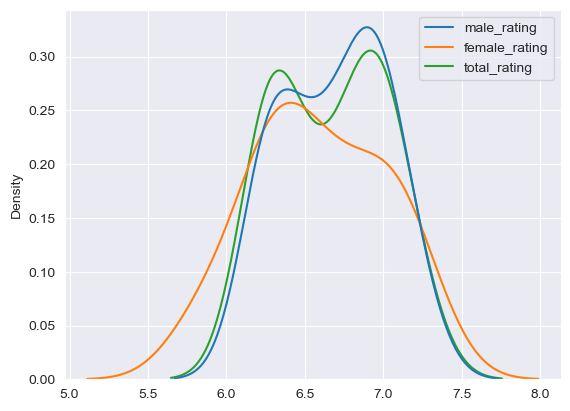

In [36]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 24, 'male_rating'],
                  demographics.loc[demographics['season'] == 24, 'female_rating'],
                  demographics.loc[demographics['season'] == 24, 'total_rating']])

<AxesSubplot: ylabel='Density'>

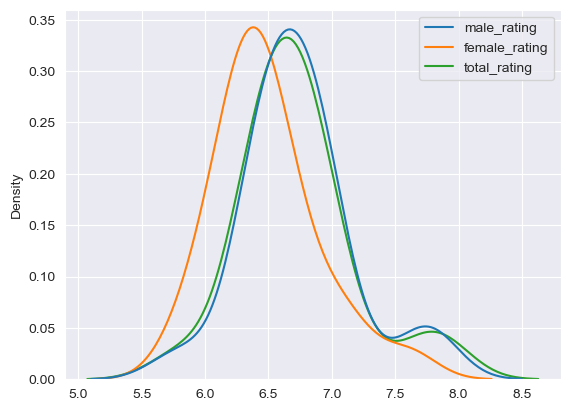

In [37]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 25, 'male_rating'],
                  demographics.loc[demographics['season'] == 25, 'female_rating'],
                  demographics.loc[demographics['season'] == 25, 'total_rating']])

<AxesSubplot: ylabel='Density'>

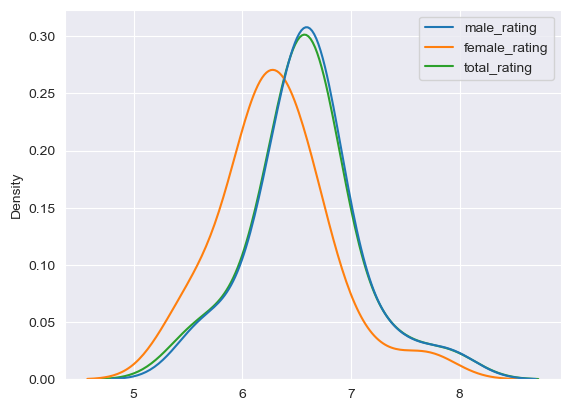

In [38]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 26, 'male_rating'],
                  demographics.loc[demographics['season'] == 26, 'female_rating'],
                  demographics.loc[demographics['season'] == 26, 'total_rating']])

<AxesSubplot: ylabel='Density'>

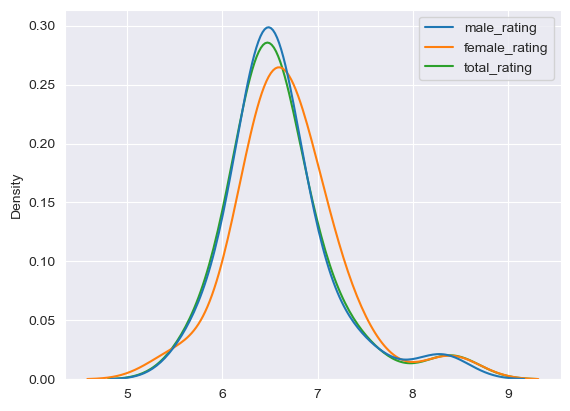

In [39]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 27, 'male_rating'],
                  demographics.loc[demographics['season'] == 27, 'female_rating'],
                  demographics.loc[demographics['season'] == 27, 'total_rating']])

<AxesSubplot: ylabel='Density'>

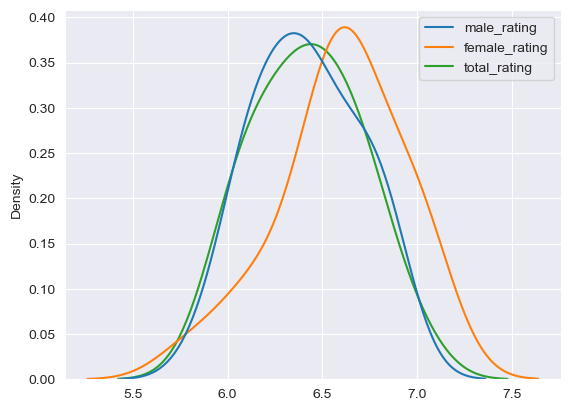

In [40]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 28, 'male_rating'],
                  demographics.loc[demographics['season'] == 28, 'female_rating'],
                  demographics.loc[demographics['season'] == 28, 'total_rating']])

<AxesSubplot: ylabel='Density'>

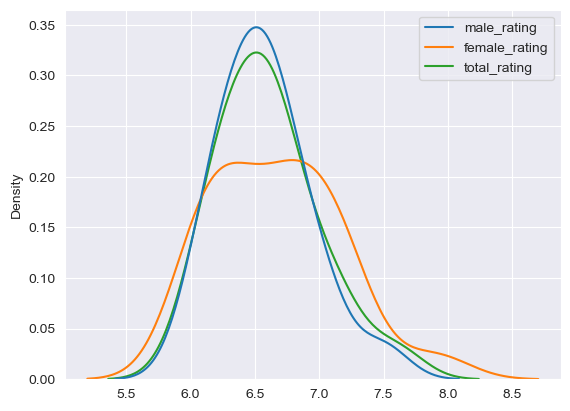

In [41]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 29, 'male_rating'],
                  demographics.loc[demographics['season'] == 29, 'female_rating'],
                  demographics.loc[demographics['season'] == 29, 'total_rating']])

<AxesSubplot: ylabel='Density'>

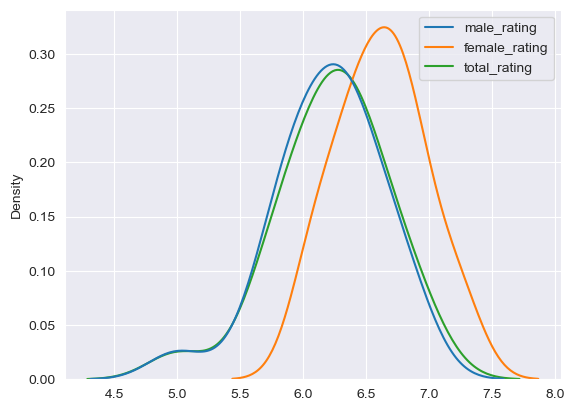

In [42]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 30, 'male_rating'],
                  demographics.loc[demographics['season'] == 30, 'female_rating'],
                  demographics.loc[demographics['season'] == 30, 'total_rating']])

<AxesSubplot: ylabel='Density'>

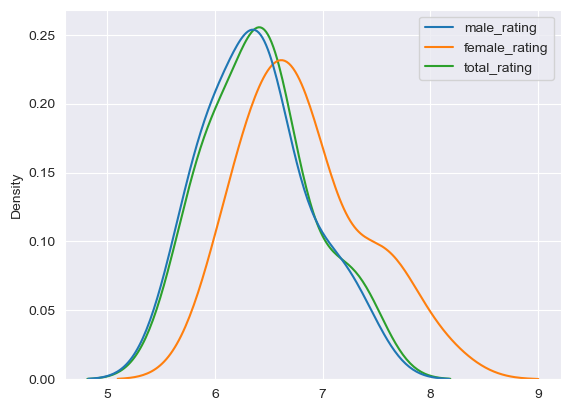

In [43]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 31, 'male_rating'],
                  demographics.loc[demographics['season'] == 31, 'female_rating'],
                  demographics.loc[demographics['season'] == 31, 'total_rating']])

<AxesSubplot: ylabel='Density'>

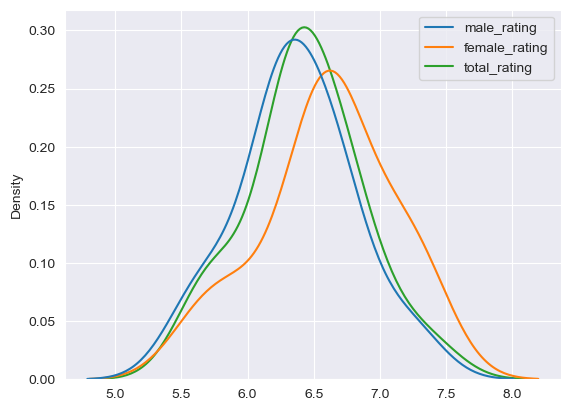

In [44]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 32, 'male_rating'],
                  demographics.loc[demographics['season'] == 32, 'female_rating'],
                  demographics.loc[demographics['season'] == 32, 'total_rating']])

<AxesSubplot: ylabel='Density'>

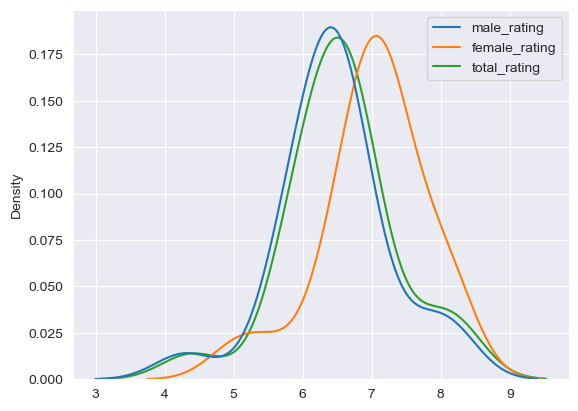

In [45]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 33, 'male_rating'],
                  demographics.loc[demographics['season'] == 33, 'female_rating'],
                  demographics.loc[demographics['season'] == 33, 'total_rating']])

<AxesSubplot: ylabel='Density'>

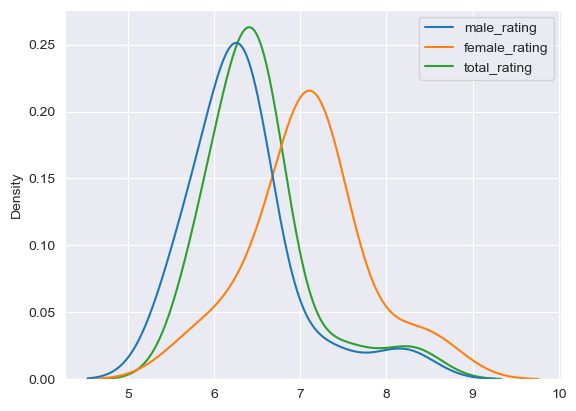

In [46]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 34, 'male_rating'],
                  demographics.loc[demographics['season'] == 34, 'female_rating'],
                  demographics.loc[demographics['season'] == 34, 'total_rating']])

## Part 3: Regressing the ratings, Key variables that explain rating, etc.

## Part 4: Cool insights e.g., TF-IDF on script lines per character

## Part 5: Ethical considerations

## Conclusions